<a href="https://www.kaggle.com/code/iqbalhossain25/function-transfrom-titanic?scriptVersionId=236085832" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-train-dataset/titanic_train.csv


In [2]:
df=pd.read_csv('/kaggle/input/titanic-train-dataset/titanic_train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [4]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [5]:
import scipy.stats as stats ## this is use for qq plot 
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [7]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [9]:
X=df.iloc[:,1:3]
y=df.iloc[:,0]

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [11]:
X_train

,Age,Fare
331,45.500000,28.5000
733,23.000000,13.0000
382,32.000000,7.9250
704,26.000000,7.8542
813,6.000000,31.2750
...,...,...
106,21.000000,7.6500
270,29.699118,31.0000
860,41.000000,14.1083
435,14.000000,120.0000


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


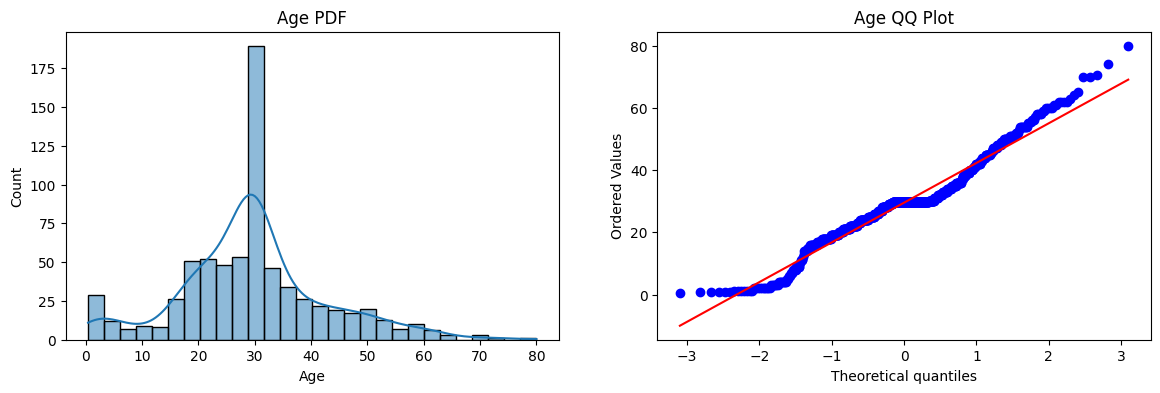

In [12]:


plt.figure(figsize=(14, 4))


plt.subplot(121)
sns.histplot(X_train['Age'], kde=True)
plt.title('Age PDF')

# Plot the QQ plot
plt.subplot(122)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ Plot')

plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


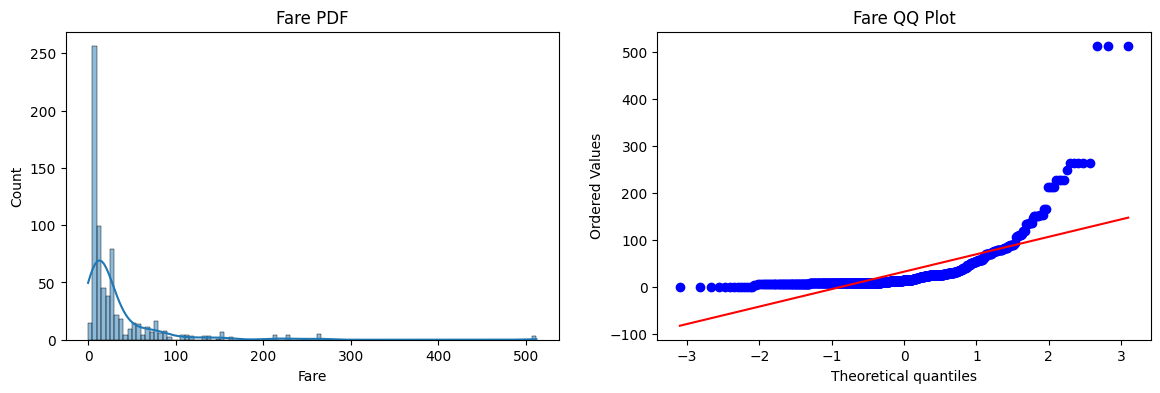

In [13]:
plt.figure(figsize=(14, 4))


plt.subplot(121)
sns.histplot(X_train['Fare'], kde=True)
plt.title('Fare PDF')

# Plot the QQ plot
plt.subplot(122)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [14]:
clf= LogisticRegression()
clf1 = DecisionTreeClassifier()

In [15]:
clf.fit(X_train,y_train)
clf1.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_pred1 = clf1.predict(X_test)

print("Accuracy LR", accuracy_score(y_test,y_pred))
print("Accuracy LR", accuracy_score(y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy LR 0.664804469273743


In [16]:
trf = FunctionTransformer(func=np.log1p)

In [17]:
X_train_transform = trf.fit_transform(X_train)
X_test_transform = trf.transform(X_test)

In [18]:
clf= LogisticRegression()
clf2 = DecisionTreeClassifier()
clf.fit(X_train_transform,y_train)
clf2.fit(X_train_transform,y_train)
y_pred = clf.predict(X_test_transform)
y_pred2 = clf2.predict(X_test_transform)

print("Accuracy LR", accuracy_score(y_test,y_pred))
print("Accuracy LR", accuracy_score(y_test,y_pred2))

Accuracy LR 0.6815642458100558
Accuracy LR 0.6815642458100558


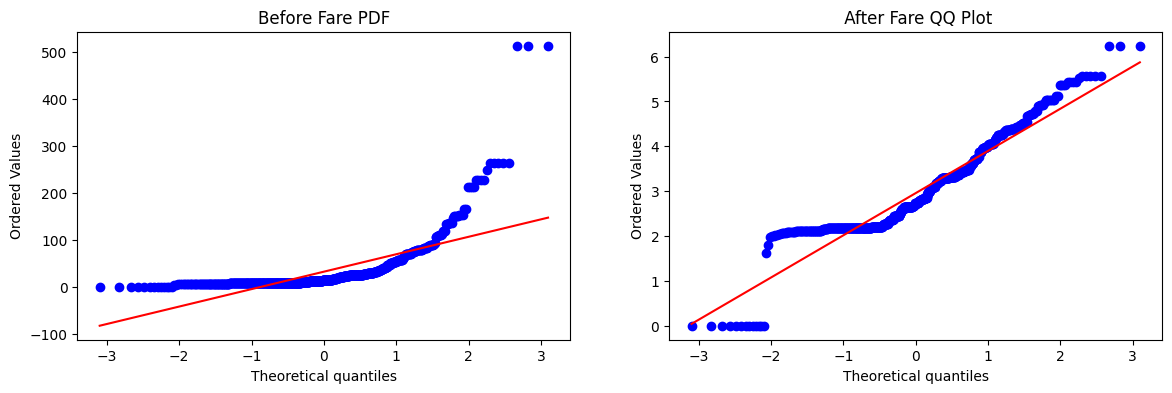

In [19]:
plt.figure(figsize=(14, 4))


plt.subplot(121)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Before Fare PDF')

# Plot the QQ plot
plt.subplot(122)
stats.probplot(X_train_transform['Fare'], dist='norm', plot=plt)
plt.title(' After Fare QQ Plot')

plt.show()

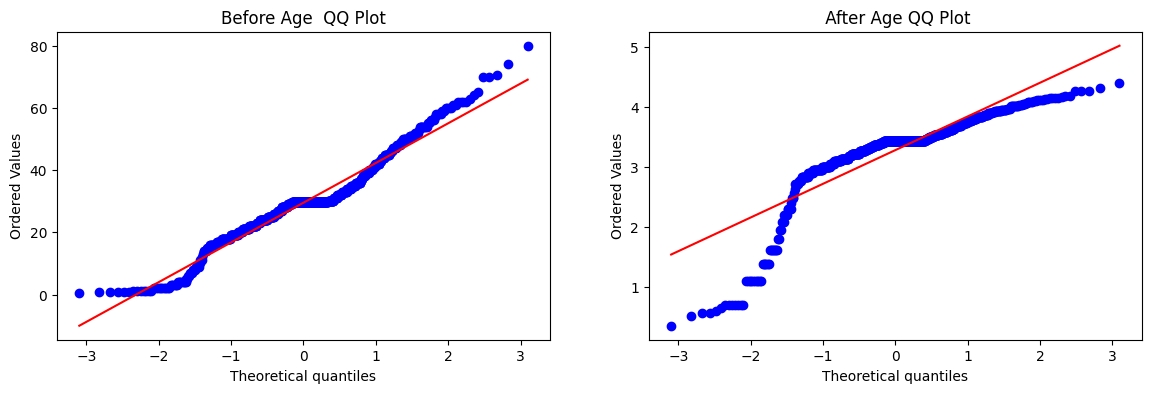

In [20]:
plt.figure(figsize=(14, 4))


plt.subplot(121)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Before Age  QQ Plot')

# Plot the QQ plot
plt.subplot(122)
stats.probplot(X_train_transform['Age'], dist='norm', plot=plt)
plt.title(' After Age QQ Plot')

plt.show()

In [21]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [22]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)
    
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.6703910614525139


In [23]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6644569288389512


In [24]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6195131086142323


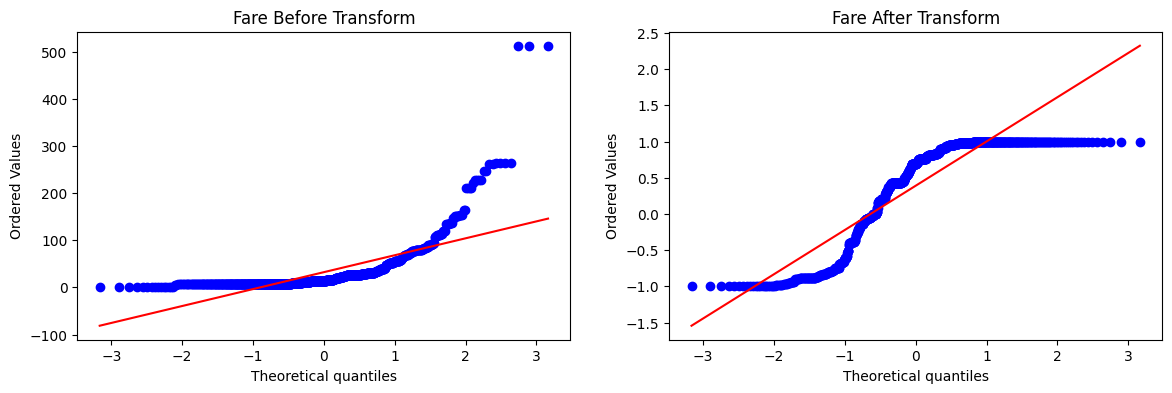

In [25]:
apply_transform(np.sin)


Accuracy 0.6611485642946316


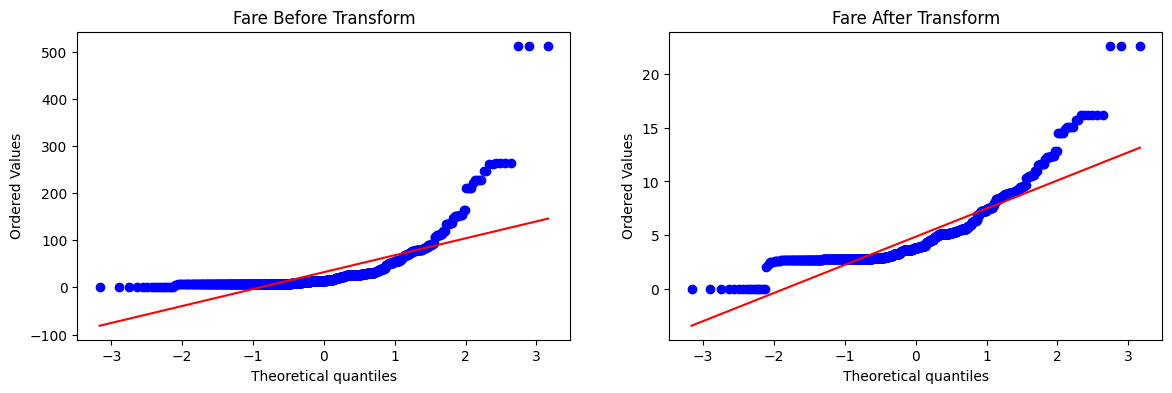

In [26]:


apply_transform(np.sqrt)